In [14]:
import sys
if '../..' not in sys.path:
    sys.path.append('../..')
    
import time
import numpy as np
from scipy import optimize

from functions import functionObj, functionObj_multiDim
from functions import exercise61, rosenbrock, exercise54
from models.optimizers import ConjugateGradientAlgorithm,\
                              InexactLineSearch,\
                              BacktrackingLineSearch,\
                              FletcherReevesAlgorithm,\
                              QuasiNewtonAlgorithm,\
                              SteepestDescentAlgorithm
from run_exercises import run_exercise

## Exercício 6.1 do Antoniou

Use ConjugateGradientAlgorithm to minimize $f(x) = \frac{1}{2}\mathbf{x}^T\mathbf{Qx} + \mathbf{b}^T\mathbf{x}$

In [2]:
x_0 = np.zeros(16)
f_x = exercise61

print('-----------Non-linear Conjugate from Scipy-----------')

f_x_obj = functionObj(f_x)
start_time_scipy = time.process_time()
x_min, f_min, _, _, _, = optimize.fmin_cg(f_x_obj, x_0, full_output=True)
scipy_time_spent = time.process_time() - start_time_scipy
x_min = f_x_obj.best_x
f_min = f_x_obj.best_f
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x_obj.fevals, f_x_obj.grad_evals, f_x_obj.nevals))
print('Time: %f s'%scipy_time_spent)

print('-----------ConjugateDescentAlgorithm-----------')
f_x_obj = functionObj(f_x)

opt = ConjugateGradientAlgorithm(f_x_obj,x_0,  1e3, xtol=1e-6)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x_obj.best_x._value
f_min = f_x_obj.best_f._value
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x_obj.fevals, f_x_obj.grad_evals, f_x_obj.nevals))
print('Time: %f s'%conjugate_spent_time)

-----------Non-linear Conjugate from Scipy-----------
Optimization terminated successfully.
         Current function value: -0.119076
         Iterations: 17
         Function evaluations: 594
         Gradient evaluations: 33
X:  [ 0.03423645  0.02423382  0.02423382  0.03423645 -0.00143385 -0.02088653
 -0.02088653 -0.00143385  0.03322047  0.02738492  0.02738492  0.03322047
 -0.00662874 -0.00486494 -0.00486493 -0.00662874]
F:  -0.11907560047255539
Function evals: 594
Gradient evals: 0
All evals: 594
Time: 0.546668 s
-----------ConjugateDescentAlgorithm-----------
X:  [ 0.03423704  0.02423337  0.02423337  0.03423704 -0.00143237 -0.02088798
 -0.02088798 -0.00143237  0.03321913  0.02738606  0.02738606  0.03321913
 -0.00663057 -0.00486331 -0.00486331 -0.00663057]
F:  -0.119075600509808
Function evals: 9
Gradient evals: 9
All evals: 18
Time: 0.094684 s


## Exercício 6.2

Use Fletcher-Reeves algorithm to find the minimizer of the Rosenbrock function.

$f(x)=100(x_2-x_1^2)^2+(1-x_1)^2$

Use $\epsilon = 10^{-6}$ and three initial points:

$\mathbf{x}_0 = [-2~~2]^T$
$\mathbf{x}_0 = [2~~-2]^T$
$\mathbf{x}_0 = [-2~~-2]^T$

In [3]:
line_search = BacktrackingLineSearch

solution_62 = run_exercise(rosenbrock, FletcherReevesAlgorithm, line_search=line_search)

<Figure size 640x480 with 1 Axes>

In [4]:
solution_62[['best_x', 'best_f', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_x,best_f,fevals,grad_evals,nevals,run_time (s)
[2 -2]T,"[0.9997719422824327, 0.999548468565804]",5.406422e-08,101271,3031,104302,14.684712
[-2 2]T,"[0.9995921842277583, 0.9991940407502706]",1.753501e-07,119676,3637,123313,17.333351
[-2 -2]T,"[1.0000759613157117, 1.0001370721205773]",2.784103e-08,121299,3643,124942,17.459422


## Exercício 6.3

minimize $f(x) = 5x_1^2-9x_1x_2+4.075x_2^2+x_1$

with $\mathbf{x}_0=[1~~1]^T$ and $\epsilon=3\times10^-6$

In [8]:
solution_63 = run_exercise(exercise54, ConjugateGradientAlgorithm, plot_charts=False)

In [19]:
f_x = functionObj(exercise54)
opt = SteepestDescentAlgorithm(func = f_x, x_0 = np.array([1.0, 1.0]),  xtol=3e-6)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x.best_x
f_min = f_x.best_f
print(SteepestDescentAlgorithm.__name__)
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%conjugate_spent_time)

SteepestDescentAlgorithm
x*:  [-16.29397364 -17.99338112]
F(x*):  -8.14999888070452
Function evals: 2001
Gradient evals: 1001
All evals: 3002
Time: 1.067420 s


In [20]:
f_x = functionObj(exercise54)
opt = ConjugateGradientAlgorithm(func = f_x, x_0 = np.array([1.0, 1.0]),  xtol=3e-6)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x.best_x._value
f_min = f_x.best_f._value
print(ConjugateGradientAlgorithm.__name__)
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%conjugate_spent_time)

ConjugateGradientAlgorithm
x*:  [-16.3 -18. ]
F(x*):  -8.149999999999824
Function evals: 3
Gradient evals: 3
All evals: 6
Time: 0.014103 s


## Exercício 7.7

Implement a quasi-Newton algorithm based on the DFP formula and minimize:

$f(x)=100(x_2-x_1^2)^2+(1-x_1)^2$

Use $\epsilon = 10^{-6}$ and three initial points:

$\mathbf{x}_0 = [-2~~2]^T$
$\mathbf{x}_0 = [2~~-2]^T$
$\mathbf{x}_0 = [-2~~-2]^T$

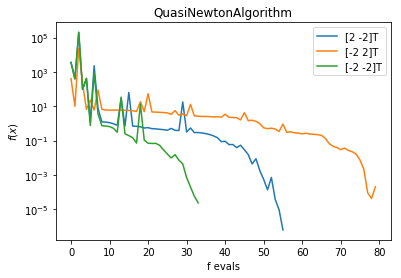

In [5]:
solution_77_DFP = run_exercise(rosenbrock, QuasiNewtonAlgorithm, formula='DFP')

In [6]:
solution_77_DFP[['best_x', 'best_f', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_x,best_f,fevals,grad_evals,nevals,run_time (s)
[2 -2]T,"[1.0006104751973983, 1.0012711872028497]",6.213231e-07,56,2039,2095,1.455443
[-2 2]T,"[0.9944433187890923, 0.989249583948909]",4.190373e-05,80,2058,2138,1.449356
[-2 -2]T,"[0.9957373840446976, 0.9917225990189015]",2.344431e-05,34,2025,2059,1.418772


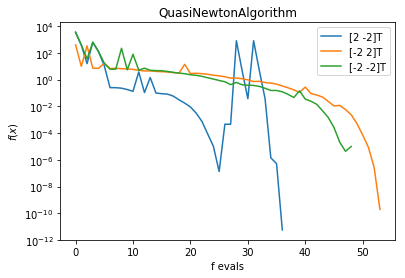

In [25]:
solution_77_BFGS = run_exercise(rosenbrock, QuasiNewtonAlgorithm, formula='BFGS')

In [26]:
solution_77_BFGS[['best_x', 'best_f', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_x,best_f,fevals,grad_evals,nevals,run_time (s)
[2 -2]T,"[0.9999978890274238, 0.999995887097943]",5.645148e-12,37,2027,2064,1.468832
[-2 2]T,"[0.9999904366992792, 0.9999798639392066]",1.933760e-10,54,2044,2098,1.453572
[-2 -2]T,"[1.0002026307799345, 1.0001969799541746]",4.380893e-06,49,2040,2089,1.453603


## Exercício 7.8

minimize $f(x) = 5x_1^2-9x_1x_2+4.075x_2^2+x_1$

with $\mathbf{x}_0=[0~~0]^T$ and $\epsilon=3\times10^-7$

In [28]:
f_x = functionObj(exercise54)
opt = QuasiNewtonAlgorithm(func = f_x, x_0 = np.array([0.0, 0.0]), formula='BFGS', xtol=3e-7)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x.best_x
f_min = f_x.best_f
print(QuasiNewtonAlgorithm.__name__ + ' with BFGS')
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%conjugate_spent_time)

QuasiNewtonAlgorithm with BFGS
x*:  [-16.3 -18. ]
F(x*):  -8.149999999999988
Function evals: 5
Gradient evals: 2004
All evals: 2009
Time: 1.889595 s


In [24]:
f_x = functionObj(exercise54)
opt = QuasiNewtonAlgorithm(func = f_x, x_0 = np.array([0.0, 0.0]), formula='DFP', xtol=3e-7)
conju_start_time = time.process_time()
opt.find_min()
conjugate_spent_time = time.process_time() - conju_start_time
x_min = f_x.best_x
f_min = f_x.best_f
print(QuasiNewtonAlgorithm.__name__ + ' with DFP')
print('x*: ', x_min)
print('F(x*): ', f_min)
print('Function evals: %d\nGradient evals: %d\nAll evals: %d'%(f_x.fevals, f_x.grad_evals, f_x.nevals))
print('Time: %f s'%conjugate_spent_time)

QuasiNewtonAlgorithm with DFP
x*:  [-16.3 -18. ]
F(x*):  -8.149999999999725
Function evals: 5
Gradient evals: 2004
All evals: 2009
Time: 1.883200 s
